# Bidirectional DC converters

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec11/Slide2.PNG" align="left" width="62%">

In this lecture we will continue with the bidirectional converter, which can be found in the electric vehicle powertrain.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide4.PNG" align="left" width="62%">

We will also extend the 2-quadrant bidirectional converter to 4-quadrant converter and three-phase inverter by adding more half bridges.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide5.PNG" align="left" width="62%">

The lecture content is shown on the slide.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide6.PNG" align="left" width="62%">

The learning objectives are shown here.
In addition to the bidirectional converter, we will also study how to make a 4-quadrant DC-DC converter and a three-phase DC/AC converter (inverter) using half bridges.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide7.PNG" align="left" width="62%">

Before moving on, let us review the DC/DC converter classes which we have studied before.
The previously studied buck converter and boost converter are both class A converters since they are only able to handle a unidirectional converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide8.PNG" align="left" width="62%">

By combining a buck converter and a boost converter, a half bridge or bidirectional converter can be combined.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide9.PNG" align="left" width="62%">

As we can see here, when the current is going forward (left to right), switch $S_1$ and the bottom diode work together as a buck converter.
When the current is going backward (right to left), switch $S_2$ and the top diode work as a boost converter.

Since only the current polarity can be changed, but not the voltage, this topology works as a class C converter.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide10.PNG" align="left" width="62%">

If we assume all components are ideal, the semiconductor switch and the anti-parallel diode can be simplified as an ideal switch.
If we turn on/off the switches $S_1$ and $S_2$ in a complementary way, i.e., when $S_1$ is on, $S_2$ is off, or the other way around.
The output voltage between node 1 and 2 will be a switched waveform $v_{PWM}$ , as shown on the right.
The average output voltage will be

$$
V_o = \bar{V}_{PWM} = DV_s.
$$

where $D$ is the duty cycle of the top switch $S_1$, and $V_s$ is the input voltage.

Since the output voltage has a switched waveform, a filter using capacitor, inductor or both can be added to the output to smooth out the ripple.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide11.PNG" align="left" width="62%">

This example explains how the bidirectional power conversion is carried out.

Here we use an inductor to smooth out the output ripples, so that it can be connected to a battery $V_b$.
The nonideal resistance in the inductor $R$ is considered here.
The average output from the middle node of the switches is $V_o = \bar{v}_{PWM}$, at steady state, the average output current or the inductor current is

$$
I_L = \frac{V_{o}-V_b}{R}.
$$

When $V_{o}>V_b$, the inductor current flows from the source $V_s$ to the battery $V_b$. 
The top switch $S_1$, the bottom diode, and the inductor form a buck circuit.
The power flows from the source to the battery.

$$
V_{o} = DV_s.
$$

When $V_{o}=V_b$, the inductor current becomes zero at steady state.
There is no power exchange between the source and the battery.

When $V_{o}<V_b$, the inductor current flows from the battery $V_b$ to the source $V_s$.
The top diode, the bottom switch and the inductor form a boost circuit.
The power flows from the battery to the source.

$$
V_{s} = \frac{1}{1-D_2}V_{o} = \frac{1}{D}V_{o}.
$$

where $D_2$ is the duty cycle of the bottom switch. Since the top and bottom switches are switched in a complementary way, $D+D_2=1$.
```

````

## Example



`````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec11/Slide12.PNG" align="left" width="62%">

Let's use the example here to practice the calculation of bidirectional dc/dc converter.
In order to determine the direction of the current, we need to know the average voltage of node 1.
For the peak to peak current ripple, we can analyse it based on the slope of the current through the inductor, as is done for buck or boost converters.

Please first work it out yourself and click the block below for the right answer.

```
````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


```{admonition} Click here for solution
:class: tip, dropdown

<img src="./lec11/Slide13.PNG" align="left" width="62%">

<img src="./lec11/Slide14.PNG" align="left" width="62%">

<img src="./lec11/Slide15.PNG" align="left" width="62%">

<img src="./lec11/Slide16.PNG" align="left" width="62%">

```
````

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec11/Slide17.PNG" align="left" width="62%">

As we can see on the slide, since the current flows from the load (200 V) to the source (500 V), the power flow is from the low voltage side to the high side. 
The converter works in the boost mode.
We can also verify the voltage transfer ratio:

$$
\begin{align}
\frac{V_{s}}{V_{o}} &= \frac{500}{100} = \frac{1}{1-D_2}\\
&= \frac{1}{D} = 5.
\end{align}
$$

You may refer to the Python code below for the calculation procedure.
```

`````

In [1]:
V_1 = 500.0
V_2 = 200.0
R   = 2.0
L   = 10.0e-3
f   = 20.0e3
D   = 0.2 # duty cycle for the top switch

# first calculate the voltage at node 1
V_PWM = D*V_1
I_L   = (V_PWM-V_2)/R
print('The value of the current IL is {:.3f} A.'.format(abs(I_L)))

if I_L < 0:
    print('The direction of the current IL is from V2 to V1.')
elif I_L > 0:
    print('The direction of the current IL is from V1 to V2.')
else:
    print('There is no current flow through the inductor.')

# to calculate the current ripple, we need to analyse the slope of the current at on/off state
# when S_1 is on: voltage across L is V_1- V_4, slope is (V_1-V_4)/L
# when S_1 is off: voltage across L is - V_4, slope is -V_4/L
# so the current ripple dIL is (V_1-V_4)/L*DT_s or V_4/L*(1-D)T_s
# the two should give us the same value because of the steady state assumption.
# Here V_4 is the voltage of node 4, which we have to solve at first
V_4 = R*I_L+V_2
dIL = (V_1-V_4)/L*D/f
print('The value of the current ripple is {:.3f} A.'.format(abs(dIL)))

The value of the current IL is 50.000 A.
The direction of the current IL is from V2 to V1.
The value of the current ripple is 0.400 A.


````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec11/Slide18.PNG" align="left" width="62%">

In order to operate the converter in buck mode in this example, $V_{o}$ at node 1 should be higher than $200 V$.
So we know the minimal duty cycle for buck mode operation is $D=200/500 = 0.4$.
As shown on the slide here, if the duty cycle is $D=0.5$, then $V_{o} = 250 V$, the current through the inductor is
$ (250 - 200)/2~A = 25~A $, and the direction is from left to right, so the converter operates in buck mode.

There is an animation available [here](http://esplab.ewi.tudelft.nl/ecars/duty_cycle.html) to show the operation of the bidirectional DC-DC converter in different modes.
```
````

## 4-quadrant converter

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec11/Slide19.PNG" align="left" width="62%">

The top two figures on this slide summarise the two operation modes of the bidirectional dc/dc converter.

The two switches are opened and closed alternatively. 
When the current flows from left
to right $S_1$ carries the current when it is closed and the bottom diode conducts when the switch is open. 
If the current to the machine in the other direction, from right to left, then switch $S_2$ and the top diode are conducting.
Note that if you would close both $S_1$ and $S_2$ simultaneously, a short circuit is created which is not good. 
If the duty cycle of $S_1$ is $D$, the average output voltage is $V_o = D V_s$.
Since $D$ is always positive, only positive voltage can be generated from the output.
Therefore it is categorised as a Class C converter.

When the bidirectional DC/DC converter is connected to a DC machine, it becomes possible to control the speed of the machine by adjusting the output voltage using the duty cycle, by changing the output voltage $V_o$ with respect to the induced voltage $E$, the current direction can be changed, so is the power flow direction.
Therefore, it is possible to operate the DC machine in both motoring and generating mode.
However, since the voltage polarity can not be changed, this converter is not able to turn the DC motor in backward, since a negative voltage is required for that.

In order to operate the DC machine in both directions in both motoring and generating modes, a 4 quadrant converter is needed.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide20.PNG" align="left" width="62%">

A 4-quadrant converter can be constructed from the studied bidirectional dc/dc converter. 
The topology of the bidirectional dc/dc converter is also called as a half bridge, or a phase leg, or sometimes phase arm.
It serves as a basic building block for more complicated power electronics converters.

Since the two switches are turned on and off alternatively, we are able to use a switching function $s(t)$ to represent how the switching status changes with time.
When $s=1$, the top switch is on, the current either flows through the top switch channel, or conducts through the top diode, depending on the current direction. The output voltage is the same as the input voltage.
When $s=0$, the bottom switch is on, the current either flows through the bottom switch channel, or conducts through the bottom diode, depending on the current direction. The output voltage becomes 0. 
The average voltage in one switching cycle becomes

$$
V_o = \bar{s}(t)V_d = DV_d.
$$

Since the top and bottom switches are switched complementary, for example when S1 is open then S2 is closed and vice versa, we can replace the phase arm with a toggle switch. Therefore we are able to simplify the half bridge to the schematic as shown on the bottom.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide21.PNG" align="left" width="62%">

If two half bridges $a$ and $b$ are connected in parallel, the average output voltages from the two are

$$
\begin{align}
V_a &= \bar{s_a}(t)V_d = D_aV_d\\
V_b &= \bar{s_b}(t)V_d = D_bV_d,\\
\end{align}
$$

where $D_a$ and $D_b$ are the duty cycles of the top switches of the two half bridges respectively.

The new topology formed by the two half bridges is called a full bridge.
If the load is connected betweent the mid points of the two half bridges, the output of the full bridge is

$$
V_o = V_a - V_b = (D_a-D_b)V_d.
$$

By adjusting $D_a$ and $D_b$, $V_o$ can be either positive or negative, so it the output current $i_o$.
Therefore, a class E converter, or a 4-quadrant converter is realised.

When the 4-quadrant converter is connected to the DC machine, it enables forward and backward rotations in both motoring and generating modes, as shown on the top right of the slide.

We will study this topology further in detail in the DC Machines part of the course.

```
```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2


<img src="./lec11/Slide22.PNG" align="left" width="62%">

If we modulate the switching function $s(t)$ so that the duty cycle changes in a sinusoidal pattern from cycle to cycle, we would be able to generate ac voltages at the output.

For the full bridge topology as we studies is the previous slide, we know $v_o$ can be either positive or negative, so we can use it to generate single phase ac voltage, i.e., the topology can also be used as a single phase DC/AC converter, or in another name, a single phase inverter.

The next step is to add a third phase arm making it is possible to generate three phase ac voltage, as shown on the bottom of the slide.
```

````

## Three phase inverter

`````{grid}

````{grid-item-card} 
:columns: 12 12 12 12
:padding: 2

<img src="./lec11/Slide23.PNG" align="left" width="62%">

To generate symmetric three phase ac voltages, we can control the duty cycles of the three phase legs to follow a sinusoidal pattern with 
120 degree phase shift and a common DC offset.

$$
\begin{align}
d_a &= \frac{1}{2} + \frac{m}{2} \cos(\omega t) \\
d_b &= \frac{1}{2} + \frac{m}{2} \cos(\omega t+\frac{2\pi}{3}) \\
d_c &= \frac{1}{2} + \frac{m}{2} \cos(\omega t-\frac{2\pi}{3}).
\end{align}
$$

where $m$ is the modulation index, a value between 0 and 1 that determines the voltage amplitude. The average value of the phase voltages, that is ignoring the effects of the switching harmonics, are obtained by multiplying the duty cycles
with the value of the source voltage. 

```{Note}
The phase sequence we use here is a-c-b.
For phase sequence a-b-c, we have to swap the phase offsets of phase b and c.
```

Therefore we have

$$
\bar{v}_a(t) = d_a(t)V_s,\ \bar{v}_b(t) = d_b(t)V_s,\ \bar{v}_c(t) = d_c(t)V_s.
$$

The line to line voltages can be solved from the symbolic calculation code below.

````
`````

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

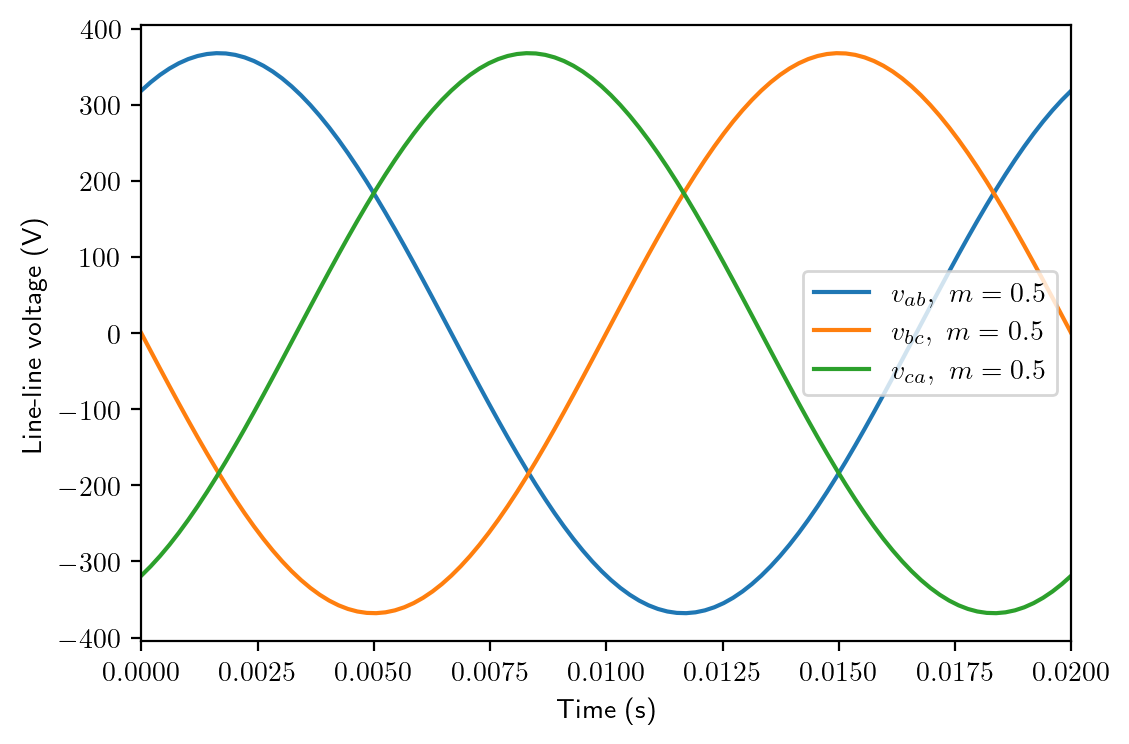

In [2]:
%reset -f
from sympy import *
from IPython.display import display, Markdown, Math, Latex
m, t, V_s = symbols('m, t, V_s')
omega = symbols('omega', nonzero=True)

d_a = 0.5 + m/2*cos(omega*t)
d_b = 0.5 + m/2*cos(omega*t+pi*2/3)
d_c = 0.5 + m/2*cos(omega*t-pi*2/3)

v_a = d_a*V_s
v_b = d_b*V_s
v_c = d_c*V_s

v_ab = v_a-v_b
v_bc = v_b-v_c
v_ca = v_c-v_a

v_abs = latex(v_ab.simplify())
display(Math(f'V_{{ab}} = {v_abs}.'))

v_bcs = latex(v_bc.simplify())
display(Math(f'V_{{bc}} = {v_bcs}.'))

v_cas = latex(v_ca.simplify())
display(Math(f'V_{{ca}} = {v_cas}.'))

import numpy as np;

v_ab_fun = v_ab.subs({V_s:850, omega:2*pi*50.0})
v_bc_fun = v_bc.subs({V_s:850, omega:2*pi*50.0})
v_ca_fun = v_ca.subs({V_s:850, omega:2*pi*50.0})

t_num   = np.linspace(0, 1/50, 100)
v_ab_lam = lambdify([t, m], v_ab_fun, "numpy")
v_bc_lam = lambdify([t, m], v_bc_fun, "numpy")
v_ca_lam = lambdify([t, m], v_ca_fun, "numpy")

import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6 , 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
                      
plt.plot(t_num, v_ab_lam(t_num, 0.5), label='$v_{ab},~ m=0.5$')
plt.plot(t_num, v_bc_lam(t_num, 0.5), label='$v_{bc},~ m=0.5$')
plt.plot(t_num, v_ca_lam(t_num, 0.5), label='$v_{ca},~ m=0.5$')

plt.xlim([0, 0.02])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Line-line voltage (V)')
plt.show()

````{grid}

```{grid-item-card} 
:columns: 12 12 12 12
:padding: 2



<img src="./lec11/Slide24.PNG" align="left" width="62%">

From the derivation and the plot above, we can see that, all the three phase voltages have a common dc offset of $V_s/2$, but it is eliminated in the three phase line-line voltages.
In the end we have symmetric three phase line-line voltage, which have an amplitude $\sqrt(3)$ times the ac component of the phase voltage.

By controlling the modulation index $m$ and the angular frequency of the modulation waveform $\omega$, we have full control of the voltage amplitude and frequency using the three phase inverter.
This way the inverter can be used to drive AC machines to adjust their speed in an efficient way.
In the AC Machines part of the course, we will study the three phase inverter and its modulation further.
```

````